In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
dataset=pd.get_dummies(dataset,drop_first=True)
dataset

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,True
1,15810944,35,20000,0,True
2,15668575,26,43000,0,False
3,15603246,27,57000,0,False
4,15804002,19,76000,0,True
...,...,...,...,...,...
395,15691863,46,41000,1,False
396,15706071,51,23000,1,True
397,15654296,50,20000,1,False
398,15755018,36,33000,0,True


In [4]:
indep=dataset[['Age', 'EstimatedSalary','Gender_Male']]
dep=dataset['Purchased']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size = 1/3, random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['gini','entropy'],
              'max_features': ['auto','sqrt','log2'],
              'splitter':['best','random']} 

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1,scoring='f1_weighted') 
   
# fitting the model for grid search 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\Prabakaran J\.conda\envs\VEAI\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Prabakaran J\.conda\envs\VEAI\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Prabakaran J\.conda\envs\VEAI\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Prabakaran J\.conda\envs\VEAI\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constrai

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='f1_weighted', verbose=3)

In [9]:
# print best parameter after tuning 
#print(grid.best_params_) 
re=grid.cv_results_
#print(re)
grid_predictions = grid.predict(X_test) 
   
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, grid_predictions)

# print classification report 
from sklearn.metrics import classification_report,accuracy_score,f1_score
clf_report = classification_report(y_test, grid_predictions)

In [10]:
from sklearn.metrics import f1_score
f1_macro=f1_score(y_test,grid_predictions,average='weighted')
print("The f1_macro value for best parameter {}:".format(grid.best_params_),f1_macro)

The f1_macro value for best parameter {'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'best'}: 0.9095717304891537


In [11]:
print("The confusion Matrix:\n",cm)

The confusion Matrix:
 [[81  4]
 [ 8 41]]


In [12]:
print("The Classification report      :\n",clf_report)
accuracy=accuracy_score(y_test,grid_predictions)
print("Accuracy score is              : ",accuracy)
f1=f1_score(y_test,grid_predictions)
print("F1 score for purchased class is: ",f1)

The Classification report      :
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        85
           1       0.91      0.84      0.87        49

    accuracy                           0.91       134
   macro avg       0.91      0.89      0.90       134
weighted avg       0.91      0.91      0.91       134

Accuracy score is              :  0.9104477611940298
F1 score for purchased class is:  0.8723404255319149


In [13]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,grid.predict_proba(X_test)[:,1])

0.8948379351740695

In [14]:
table=pd.DataFrame.from_dict(re)
table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000224,0.000447,0.000000,0.000000,gini,auto,best,"{'criterion': 'gini', 'max_features': 'auto', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,0.000501,0.001002,0.000000,0.000000,gini,auto,random,"{'criterion': 'gini', 'max_features': 'auto', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
2,0.005024,0.000851,0.003337,0.001839,gini,sqrt,best,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.847141,0.831253,0.796284,0.886792,0.924528,0.857200,0.044484,1
3,0.002916,0.001082,0.003824,0.001362,gini,sqrt,random,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.804764,0.866968,0.740173,0.885265,0.906166,0.840667,0.060595,4
4,0.000906,0.001468,0.002181,0.002401,gini,log2,best,"{'criterion': 'gini', 'max_features': 'log2', ...",0.782557,0.849057,0.832483,0.886792,0.826499,0.835477,0.033787,5
5,0.001174,0.001072,0.000803,0.000855,gini,log2,random,"{'criterion': 'gini', 'max_features': 'log2', ...",0.829615,0.849057,0.698113,0.829124,0.868632,0.814908,0.060186,7
6,0.000284,0.000348,0.000000,0.000000,entropy,auto,best,"{'criterion': 'entropy', 'max_features': 'auto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
7,0.000755,0.001164,0.000000,0.000000,entropy,auto,random,"{'criterion': 'entropy', 'max_features': 'auto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
8,0.002023,0.000856,0.002651,0.000669,entropy,sqrt,best,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.804764,0.795789,0.775815,0.813179,0.905069,0.818923,0.044829,6
9,0.002017,0.001157,0.001729,0.001415,entropy,sqrt,random,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.849794,0.831253,0.796284,0.791152,0.770530,0.807803,0.028679,8


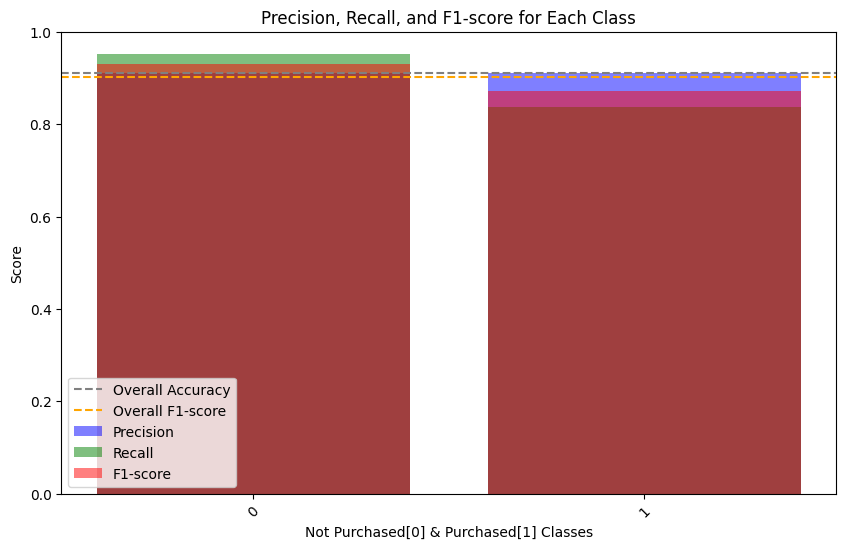

In [16]:
report = classification_report(y_test, grid_predictions, output_dict=True)

# Overall accuracy and F1-score
overall_accuracy = report['accuracy']
overall_f1_score = report['macro avg']['f1-score']

# Extract class-wise precision, recall, and F1-score
class_names = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'
class_precision = [report[class_name]['precision'] for class_name in class_names]
class_recall = [report[class_name]['recall'] for class_name in class_names]
class_f1_score = [report[class_name]['f1-score'] for class_name in class_names]

# Plot graph for true class accuracy score and F1-score
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_precision, color='blue', alpha=0.5, label='Precision')
plt.bar(class_names, class_recall, color='green', alpha=0.5, label='Recall')
plt.bar(class_names, class_f1_score, color='red', alpha=0.5, label='F1-score')
plt.axhline(y=overall_accuracy, color='gray', linestyle='--', label='Overall Accuracy')
plt.axhline(y=overall_f1_score, color='orange', linestyle='--', label='Overall F1-score')
plt.xlabel('Not Purchased[0] & Purchased[1] Classes')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-score for Each Class')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
'''code explanation
The classification report is assumed to be stored in the variable report, which is obtained using the classification_report function with output_dict=True.

The overall accuracy and F1-score are extracted directly from the dictionary report. The overall accuracy is accessed using the key 'accuracy', while the overall F1-score is obtained from the 'macro avg' key under the F1-score.

Next, class-wise precision, recall, and F1-score are extracted from the dictionary. The class names are obtained by excluding the keys 'accuracy', 'macro avg', and 'weighted avg'.

A bar plot is created using matplotlib to visualize the precision, recall, and F1-score for each class. Different colors are used for each metric (precision: blue, recall: green, F1-score: dark blue).

Horizontal lines representing the overall accuracy and F1-score are added to the plot using axhline.

The plot is annotated with appropriate labels, title, and legend.

Finally, the plot is displayed using plt.show().'''

In [17]:
import pickle
filename='finalized_model_ML_Grid_DT_Classification.sav'
pickle.dump(grid,open(filename,'wb'))

In [22]:
loaded_model=pickle.load(open('finalized_model_ML_Grid_DT_Classification.sav','rb'))
result=loaded_model.predict([[50,20000,False]])
#result=loaded_model.predict([[X_train]])
print(result)

[1]


In [21]:
print(np.shape(indep))

(400, 3)
